# Analysis Gestalt appreciation & numerosity estimation experiment



**Researchers: Elise Berbiers (MA student), Rebecca Chamberlain, Johan Wagemans, Sander Van de Cruys**
___


Replication & extension of experiment 1 in: 

> Topolinski, S., Erle, T. M., & Reber, R. (2015). Necker’s smile: Immediate affective consequences of early perceptual processes. Cognition, 140, 1–13.

Notes: 

* All errorbars are **95% CIs**
* Only a 100 milliseconds exposure duration was used, instead of the two exposure durations (25 ms and 100 ms) in Topolinski, Erle, & Reber (2015). Note that Topolinski, Erle, & Reber found the effect for both exposure durations.
* 30 coherent *"Gestalt"* images, 30 *scrambled* versions, 23 *inverted* Gestalt images (7 images don't have a singular canonical orientation).
* On the construction of the scrambled stimuli Topolinski & Strack write: 
> "First, we developed and tested a set of pictorial stimuli that were useful for intuitive judgments because they were so degraded that they could only rarely be visually recognized (Bower et al., 1990). We used 30 black-and-white drawings of everyday objects randomly chosen from the inventory by Snodgrass and Vanderwart (1980), with the only constraint being that depicted objects were visually not too simple (e.g., a circle). Following Volz and von Cramon (2006), these stimuli were visually degraded by a filter that masked the black picture on the white background by increasing the white pixels by 75%. These pictures were the object condition (Volz & von Cramon, 2006) since they depicted visually degraded real objects. Then, these pictures were divided into nine equal rectangles (3x3); and these rectangles were randomly rotated within the picture (Volz & von Cramon, 2006; cf., Bower et al., 1990; Wippich, 1994). Thus, these pictures contained the same pixel information as in the object condition and even contained local collinearities (Volz & von Cramon, 2006), but the picture as a whole depicted a physically impossible and thus meaningless object. These pictures were used in the nonobject condition."



- Interestingly, there is no effect of condition on density, but there is one on hull. This is probably due to the stimulus generation: the fact that the scrambled are made by scrambling 'tiles' of the source (which may keep the nearest dots together, and density measures the average distance to the nearest dots).

- I agree we should address the zygomaticus data. Because the participants liked the inverted condition as much as the gestalt I think this is fairly easily addressed - we would predict the same pattern of results for inverted vs. scrambled as gestalt vs. scrambled (i.e. more positive affect). The authors state in the paper, 'We interpret this differential finding in the way that a success in early Gestalt integration immediately evokes an increase in positive affectivity’ (p.6). I think we could argue the same for the inverted condition, but it is low level grouping/clustering rather than higher-level gestalt that is producing the positive affect. Compact/dense figures are more easily processed, hence liked?

- I also have some doubts on the way I analyzed it. Basically, I've done a simple anova of condition on ratings (as in Topolinski), where scramble is significant. Then, to look at the low-level measures, I computed mean rating for each image, and added variables for the extra measures of this image. In this case, an anova of condition on ratings is not significant.  If I add hull as predictor, then scramble becomes significant (0.045) and hull is too. If I add density (but not hull), there's no scramble effect, but there is a density effect. Finally, including all three leaves nothing significant.

- At first glance I think the first approach (adding mean hull/density etc. for the mean image ratings) is more appropriate, but I agree we should check this with the lab. However, I’m not sure if adding them all in to the same ANCOVA is the right way to go. Aren’t there dependencies between some the measures (i.e. don’t we run into collinearity problems?). Should it then be three separate ANCOVAs with the image statistics as covariates?

- If I now use the full dataset to add the low-level measures, so I just add the columns of density/hull to every existing trial, then scramble stays significant (note that it already was significant in this dataset), and additionally scramble*hull interaction and main effect of density become significant. So it seems these low-level measures are not sufficient/appropriate to account for the scramble-effect.


Overall I think there is a good story here but it’s worth presenting to the lab and checking:

1. How to analyse the effect of the image statistics
2. How to present the numerosity effects so they are in line with the story


In [1]:
import pandas as pd
from pandas import DataFrame
from psychopy import data, core, gui, misc
import numpy as np
import seaborn as sns
#from ggplot import *
import scipy.stats as stats

import statsmodels.formula.api as smf
import statsmodels.api as sm
from __future__ import division

from pivottablejs import pivot_ui
%pylab inline

#plotting params
from matplotlib import rcParams
rcParams['font.family'] = 'ubuntu'
sns.set(style="whitegrid", color_codes=True)
sns.set_context("talk")

Populating the interactive namespace from numpy and matplotlib


## Importing data

In [2]:
# get data file names
files = gui.fileOpenDlg("../data")

dfs = []

for filename in files:
    
    #print(filename)
    df = pd.read_table(filename, sep=",") #only Appreciation trials 85
   
    dfs.append(df)
    
    
df = pd.concat(dfs, ignore_index=True)    

In [3]:
len(df)

12397

In [ ]:
dfApp = df[pd.notnull(df.images)]       
dfNum = df[pd.notnull(df.imgA)]

print('total len:', len(dfApp))
print('total len:', len(dfNum))

# Appreciation experiment


Relevant vars:

* condition
* rating.response
* rating.rt

In [128]:
dfApp = dfApp.rename(columns={'rating.response': 'rating'})
dfApp = dfApp.rename(columns={'rating.rt': 'rt'})

#add var for img
dfApp.loc[:,"img"]= dfApp.images.str.extract("(\d+)", expand=False).astype(int)


print(dfApp.columns)
dfApp.to_csv("dataLiking.csv")


Index([u'Unnamed: 0', u'images', u'condition', u'imgB', u'imgA',
       u'trials.thisRepN', u'trials.thisTrialN', u'trials.thisN',
       u'trials.thisIndex', u'numLoop.thisRepN', u'numLoop.thisTrialN',
       u'numLoop.thisN', u'numLoop.thisIndex', u'response.keys',
       u'response.rt', u'rating', u'rt', u'key_resp_2.keys', u'key_resp_2.rt',
       u'numResp.keys', u'numResp.corr', u'numResp.Alocation', u'numResp.rt',
       u'date', u'frameRate', u'expName', u'session', u'participant',
       u'Unnamed: 27', u'img_x', u'density_x', u'hull_x', u'density_y',
       u'hull_y', u'img_y', u'density', u'hull', u'img'],
      dtype='object')


In [2]:
dfApp = pd.read_csv("dataLiking.csv")

## Descriptive stats

In [4]:
print(len(dfApp['participant'].unique()))
len(dfApp)

77


6391

In [22]:
dfApp.groupby(["condition"]).rating.describe()

condition       
gestalt    count    2310.000000
           mean        4.655411
           std         1.678554
           min         1.000000
           25%         4.000000
           50%         5.000000
           75%         6.000000
           max         9.000000
inverted   count    1771.000000
           mean        4.663467
           std         1.683658
           min         1.000000
           25%         4.000000
           50%         5.000000
           75%         6.000000
           max         9.000000
scrambled  count    2310.000000
           mean        4.554113
           std         1.640851
           min         1.000000
           25%         3.000000
           50%         5.000000
           75%         5.000000
           max         9.000000
Name: rating, dtype: float64

In [23]:
dfApp.groupby(["condition"]).rt.describe()

condition       
gestalt    count    2310.000000
           mean        2.208088
           std         1.304615
           min         0.702000
           25%         1.519000
           50%         1.885000
           75%         2.464250
           max        17.085000
inverted   count    1771.000000
           mean        2.235396
           std         1.530664
           min         0.668000
           25%         1.485000
           50%         1.886000
           75%         2.485000
           max        29.619000
scrambled  count    2310.000000
           mean        2.217398
           std         2.122818
           min         0.602000
           25%         1.436000
           50%         1.819000
           75%         2.402000
           max        64.118000
Name: rt, dtype: float64

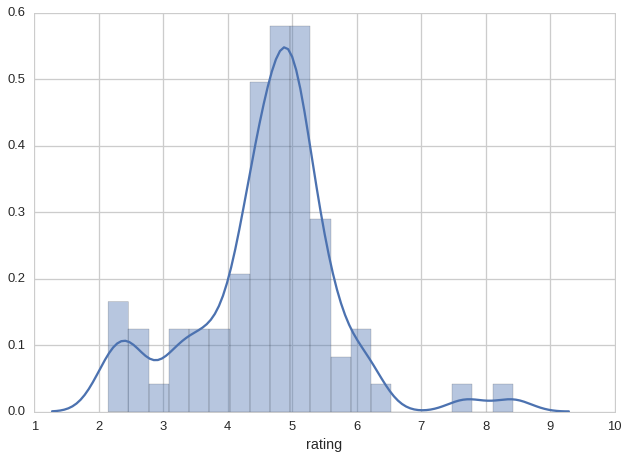

In [4]:
sns.distplot(dfApp.groupby(['participant']).rating.mean(), bins=20);

## Does gestaltness influence appreciation? 

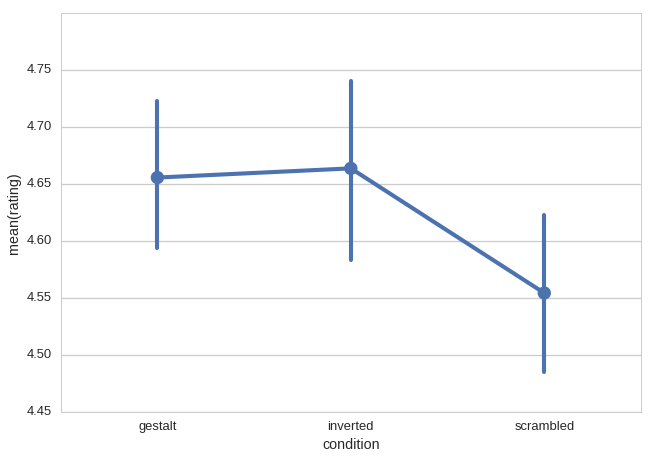

In [8]:
#sns.violinplot(x="condition", y="rating.response", data=dfApp);
sns.pointplot(x="condition", y="rating", unit="participant", data=dfApp);


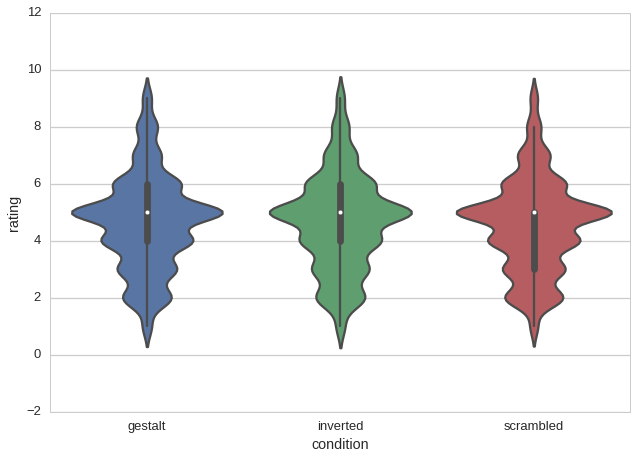

In [25]:
sns.violinplot(x="condition", y="rating", unit="participant", data=dfApp);

In [119]:
# GLM test

model = smf.glm(formula="rating ~ condition", data=dfApp)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                 6391
Model:                            GLM   Df Residuals:                     6388
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                   2.77706161598
Method:                          IRLS   Log-Likelihood:                -12331.
Date:                 vr, 03 mrt 2017   Deviance:                       17740.
Time:                        02:29:10   Pearson chi2:                 1.77e+04
No. Iterations:                     4                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  4.6554      0.035    134.268      0.000         4.587     4.723
condition[T.inve

## Interim conclusion: 

* scrambling effect is significant, in expected direction (less liked).
* Inversion does not seem to matter, meaning it probably is not an (implicitly processed) "familiar Gestalt" effect.
* Note: no item effect included. Add it? (but then: incomplete data, bc inverted)

## Correlation between individual difference scores (appreciation of Gestalt minus scrambled patterns) and PNS scores

In [3]:
# compute diff score to correlate with PNS score

print(len(dfApp['participant'].unique()))

def diffScore(df):
    
    gestaltm =  df[df.condition=='gestalt'].rating.mean()
    scrambledm = df[df.condition=='scrambled'].rating.mean()
    
    diff= gestaltm - scrambledm
    
    #df['id'].iloc[0]
    dfout = pd.DataFrame(data=[(gestaltm, scrambledm, diff)],\
                         columns=['gestaltm', 'scrambledm', 'diff'])
    
    return dfout

dfdiff = dfApp.groupby('participant').apply(diffScore)
dfdiff = dfdiff.reset_index()




77


In [4]:

# add PNS scores
dfPNS = pd.read_table("ScoringPNS.csv", sep=",") 
dfPNS = dfPNS.iloc[4:,:]
dfPNS["participant"] = pd.to_numeric(dfPNS["participant"])
dfmerged= pd.merge(dfdiff, dfPNS, how='outer', on='participant')
dfmerged.head()

,participant,level_1,gestaltm,scrambledm,diff,Geslacht,Geboortejaar,Totaalscore
0,5635.0,0.0,4.900000,4.133333,0.766667,vrouw,1987.0,55.0
1,7333.0,0.0,4.800000,4.733333,0.066667,vrouw,1994.0,39.0
2,7576.0,0.0,2.233333,2.133333,0.100000,vrouw,1994.0,49.0
3,9010.0,0.0,5.000000,4.966667,0.033333,vrouw,1992.0,59.0
4,11485.0,0.0,5.233333,5.000000,0.233333,vrouw,1995.0,51.0


### Does higher PNS (personal need for structure) imply higher relative appreciation of Gestalt vs scrambled patterns?

0.10129870129870132

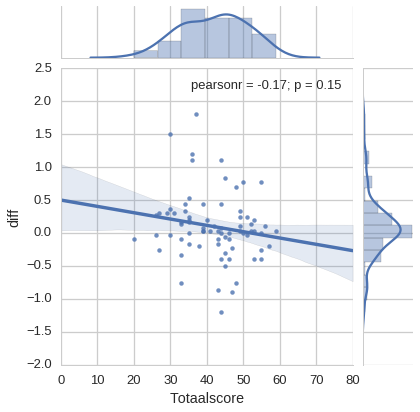

In [11]:
sns.jointplot(x="Totaalscore", y="diff", data=dfmerged, kind="reg");
dfmerged["diff"].mean()

## Interim conclusion

* Nonsign correlation
* Trend in direction opposite to expected: higher PNS -> less liking of Gestalt vs scrambled.
* This outcome is what would be expected if the "Gestalt-effect" is not actually caused by coherent Gestalt, but by more basic image feature not related to PNS?
* main effect on rating?

# Numerosity experiment


* 2-IFC: which has the most dots (first or second image)
* Note that all comparison images have exactly the same numbers of dots in reality
* Hence any deviation from .50 is caused by the difference in configuration

Relevant vars:

* acc: percentage choice for first image
* rt
* condition

In [125]:
dfNum = dfNum.rename(columns={'numResp.corr': 'acc','numResp.rt': 'rt', 'numResp.Alocation': 'Alocation' })
#add var for img
dfNum.loc[:,"img"]= dfNum.imgA.str.extract("(\d+)", expand=False).astype(int)

dfNum.to_csv('dfNum.csv', sep='\t')

In [5]:
dfNum = pd.read_csv("dfNum.csv", sep='\t')

In [123]:
print dfNum.columns
print dfNum.dtypes

Index([u'Unnamed: 0', u'images', u'condition', u'imgB', u'imgA',
       u'trials.thisRepN', u'trials.thisTrialN', u'trials.thisN',
       u'trials.thisIndex', u'numLoop.thisRepN', u'numLoop.thisTrialN',
       u'numLoop.thisN', u'numLoop.thisIndex', u'response.keys',
       u'response.rt', u'rating.response', u'rating.rt', u'key_resp_2.keys',
       u'key_resp_2.rt', u'numResp.keys', u'numResp.corr',
       u'numResp.Alocation', u'numResp.rt', u'date', u'frameRate', u'expName',
       u'session', u'participant', u'Unnamed: 27', u'img'],
      dtype='object')
Unnamed: 0              int64
images                float64
condition              object
imgB                   object
imgA                   object
trials.thisRepN       float64
trials.thisTrialN     float64
trials.thisN          float64
trials.thisIndex      float64
numLoop.thisRepN      float64
numLoop.thisTrialN    float64
numLoop.thisN         float64
numLoop.thisIndex     float64
response.keys         float64
response.rt    

### Does Gestaltness (and inversion) influence numerosity estimation?

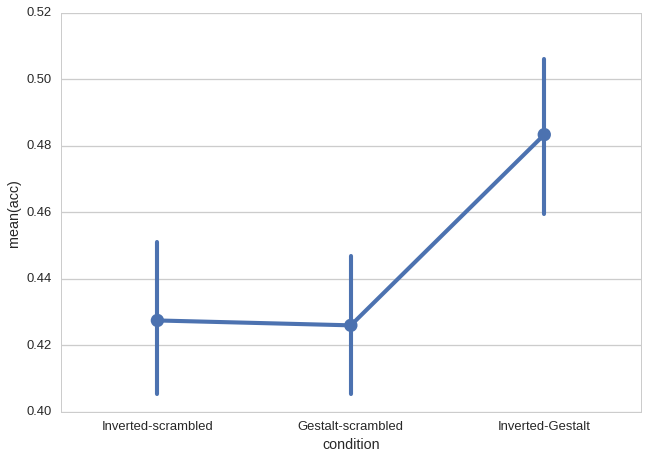

In [16]:
sns.pointplot(x="condition", y="acc",unit="participant", data=dfNum);
#sns.axlabel("Condition", "Percentage higher")

#sns.stripplot(x="condition", y="acc",unit="participant", data=dfNum, jitter=True);

In [33]:
model = smf.glm(formula="acc ~ condition", data=dfNum,  family=sm.families.Binomial())

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    acc   No. Observations:                 5852
Model:                            GLM   Df Residuals:                     5849
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4011.2
Date:                 do, 02 mrt 2017   Deviance:                       8022.4
Time:                        20:05:33   Pearson chi2:                 5.85e+03
No. Iterations:                     6                                         
                                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                          -0.2983      0.042     -7.089      0.000        -0.381

In [6]:
dfimnum = dfNum.groupby(['imgA','imgB','condition'])['acc'].mean()
dfimnum= dfimnum.reset_index()
dfimnum.head()

,imgA,imgB,condition,acc
0,images/INVk01.bmp,images/i01.bmp,Inverted-scrambled,0.506494
1,images/INVk01.bmp,images/k01.bmp,Inverted-Gestalt,0.337662
2,images/INVk03.bmp,images/i02.bmp,Inverted-scrambled,0.246753
3,images/INVk03.bmp,images/k02.bmp,Inverted-Gestalt,0.389610
4,images/INVk04.bmp,images/i04.bmp,Inverted-scrambled,0.558442


### Notes

- The numerosity exp might be nice to add, because it is consistent with the liking results. Basically, people noticed the equal number of dots for the comparison Gestalt vs inverted (it's around 50%, where it theoretically always should be because the compared images always contained an equal amount of dots). In the other comparisons you see they (substantially) overestimate the dots in the scrambled condition (or underestimate the Gestalt/inverted condition). 


# Checking for low-level structural measures of the test images

Using scikit-image:

- Stéfan van der Walt, Johannes L. Schönberger, Juan Nunez-Iglesias, François Boulogne, Joshua D. Warner, Neil Yager, Emmanuelle Gouillart, Tony Yu and the scikit-image contributors. scikit-image: Image processing in Python. PeerJ 2:e453 (2014) http://dx.doi.org/10.7717/peerj.453

In [7]:
# prerequisites

import os, re
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage.morphology import skeletonize, convex_hull_image, disk
from skimage import io
from skimage.measure import label, regionprops
from skimage.filters.rank import entropy
from skimage.feature import peak_local_max



def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')


## Compute measures: convex hull area and density


### Convex hull area

* [Convex hull docs](http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_morphology.html#convex-hull): putting an elastic band around all elements to form the smallest possible convex polygon
* Intuitively the area depends on how much the points are spread out.
* One possible measure of clustering/compactness

### Density 

* For each dot: mean of distances to 3 closest neighbors, averaged over all dots


In [8]:
from itertools import repeat

def distance(p1,p2):
    """Euclidean distance between two points."""
    x1,y1 = p1
    x2,y2 = p2
    return np.hypot(x2 - x1, y2 - y1)


# get data file names
files = gui.fileOpenDlg("../ExpCode/images/)")#, allowed="bmp files (*.bmp)|*.bmp")

d = []

for filename in files:
    
    #print(filename)
    stim = io.imread(filename, as_grey=True)
    stim = img_as_ubyte(io.imread(filename, as_grey=True))
    #fig, ax = plt.subplots()
    #ax.imshow(stim, cmap=plt.cm.gray)
    
    #compute convex hull for this img
    
    chull = convex_hull_image(stim == 0)
    #plot_comparison(stim, chull, 'convex hull')
    label_img = label(chull)
    regions_img = regionprops(label_img)
    region = regions_img[0]

    hull= float(region.convex_area)/(chull.shape[0]*chull.shape[1])
    #print "percentage pixels of convex hull image: ", hull
    
    #compute density for this img
    
    stim = numpy.invert(stim) # peaks should be white
    # extract peaks aka dots
    coords = peak_local_max(stim, min_distance=1) 
    #print coords
    #print len(coords)
    #print len(stim[stim>.5])
    
    #compute density as mean of distances to 3 closest neighbors
    
    density = 0
    for p1 in coords:
        
        dists = [distance(*pair) for pair in zip(repeat(p1),coords)]
        sorted_dists = np.sort(dists)[1:6] # take only distances to 3 closest neighbors 
        av_dist = np.mean(sorted_dists)
        density += av_dist
        #print "dists: ", len(dists)
        #print "sorted: ", sorted_dists
        #print "average: ", av_dist 

    density /= len(coords)  
    
    d.append({'images': filename.split("GestaltAppreciation/ExpCode/")[1] ,'hull': hull, 'density': 1/density})

#print(d)                 
stims = pd.DataFrame(d)


In [9]:
# make dataset where row is image

dfim = dfApp.groupby(['images','condition'])['rating'].mean()
dfim= dfim.reset_index()
dfim.head()

,images,condition,rating
0,images/INVk01.bmp,inverted,4.623377
1,images/INVk03.bmp,inverted,5.051948
2,images/INVk04.bmp,inverted,4.883117
3,images/INVk05.bmp,inverted,4.636364
4,images/INVk06.bmp,inverted,5.090909


In [10]:
dfmerged= pd.merge(dfim, stims, how='outer', on='images')
dfmerged.head()

,images,condition,rating,density,hull
0,images/INVk01.bmp,inverted,4.623377,0.042087,0.405378
1,images/INVk03.bmp,inverted,5.051948,0.037459,0.284544
2,images/INVk04.bmp,inverted,4.883117,0.122270,0.177222
3,images/INVk05.bmp,inverted,4.636364,0.075178,0.422333
4,images/INVk06.bmp,inverted,5.090909,0.142449,0.320022


In [11]:
dfmerged.to_csv("dataLikingWithLowlevel.csv")

In [12]:
dfApp= pd.merge(dfApp, stims, how='outer', on='images')

In [112]:
# GLM test
model = smf.glm(formula="rating ~ condition * hull * density", data=dfApp)
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                 6391
Model:                            GLM   Df Residuals:                     6379
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                   2.74561545086
Method:                          IRLS   Log-Likelihood:                -12290.
Date:                 vr, 03 mrt 2017   Deviance:                       17514.
Time:                        02:02:37   Pearson chi2:                 1.75e+04
No. Iterations:                     4                                         
                                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                               4.4104      0.195     22.562      0.000  

### Do low-level measures influence on numerosity judgments?

In [13]:
dfnummerged= pd.merge(dfimnum, stims, how='left', left_on='imgA', right_on='images')
dfnummerged = dfnummerged.rename(columns={'hull': 'Ahull','density': 'Adensity', 'images': 'imageA' })
dfnummerged= pd.merge(dfnummerged, stims, how='left', left_on='imgB', right_on='images')
dfnummerged = dfnummerged.rename(columns={'hull': 'Bhull','density': 'Bdensity', 'images': 'imageB' })
dfnummerged["hullDiff"]= dfnummerged.Ahull-dfnummerged.Bhull
dfnummerged["densDiff"]= dfnummerged.Adensity-dfnummerged.Bdensity
dfnummerged["img"]= dfnummerged['imgA'].str.extract("(\d+)", expand=False).astype(int)

dfnummerged.tail()      

,imgA,imgB,condition,acc,Adensity,Ahull,imageA,Bdensity,Bhull,imageB,hullDiff,densDiff,img
71,images/k26.bmp,images/i26.bmp,Gestalt-scrambled,0.402597,0.080094,0.390256,images/k26.bmp,0.069329,0.487544,images/i26.bmp,-0.097289,0.010765,26
72,images/k27.bmp,images/i27.bmp,Gestalt-scrambled,0.363636,0.047082,0.614856,images/k27.bmp,0.045116,0.613244,images/i27.bmp,0.001611,0.001965,27
73,images/k28.bmp,images/i28.bmp,Gestalt-scrambled,0.467532,0.040997,0.526589,images/k28.bmp,0.039622,0.572244,images/i28.bmp,-0.045656,0.001376,28
74,images/k29.bmp,images/i29.bmp,Gestalt-scrambled,0.454545,0.025978,0.433644,images/k29.bmp,0.021131,0.607122,images/i29.bmp,-0.173478,0.004846,29
75,images/k30.bmp,images/i30.bmp,Gestalt-scrambled,0.324675,0.075379,0.256967,images/k30.bmp,0.060815,0.465278,images/i30.bmp,-0.208311,0.014563,30


In [14]:
lldf = dfnummerged[dfnummerged.condition == "Gestalt-scrambled"]
lldf = lldf[['img','hullDiff', 'densDiff']]
lldf.head()

,img,hullDiff,densDiff
46,1,-0.234444,0.004609
47,2,-0.290244,0.011147
48,3,-0.270767,0.010158
49,4,-0.114578,0.008447
50,5,-0.189000,0.002292


In [118]:

model = smf.glm(formula="acc ~ hullDiff*condition", data=dfnummerged, family=sm.families.Binomial())

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    acc   No. Observations:                   76
Model:                            GLM   Df Residuals:                       70
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -52.070
Date:                 vr, 17 mrt 2017   Deviance:                       89.371
Time:                        01:30:22   Pearson chi2:                     2.14
No. Iterations:                     6                                         
                                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
Intercept                                   -0.3314      0.457     -0.7

### How is convex hull area distributed? (over images)

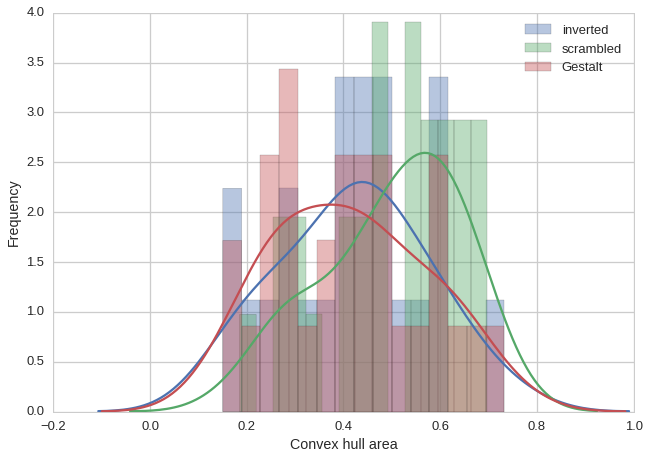

In [15]:

g = sns.distplot(dfmerged[dfmerged.condition=="inverted"].hull, bins=15, label="inverted");
sns.distplot(dfmerged[dfmerged.condition=="scrambled"].hull, bins=15, label="scrambled");
sns.distplot(dfmerged[dfmerged.condition=="gestalt"].hull, bins=15, label="Gestalt");
plt.legend();

g.set(xlabel='Convex hull area', ylabel='Frequency');


### Does convex hull area differ across conditions? 

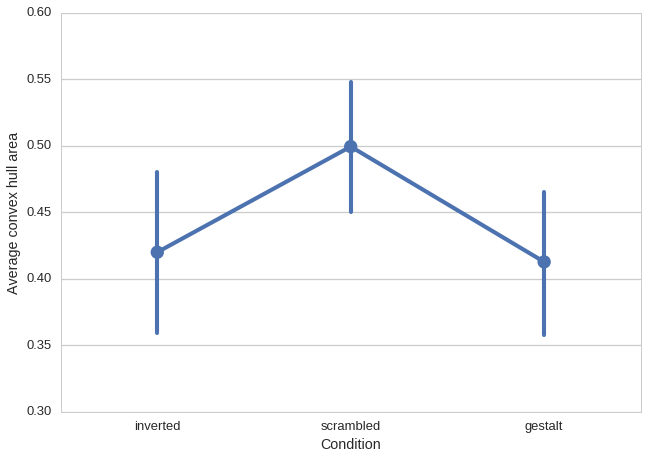

In [39]:
g = sns.pointplot(x="condition", y="hull", data=dfmerged, linestyles=["-"]);
g.set(xlabel='Condition', ylabel='Average convex hull area');

In [40]:
# GLM test

model = smf.glm(formula="hull ~ condition", data=dfmerged)
#model = smf.ols(formula="rating ~ hull", data=dfmerged)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   hull   No. Observations:                   83
Model:                            GLM   Df Residuals:                       80
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                 0.0222705247439
Method:                          IRLS   Log-Likelihood:                 41.642
Date:                 do, 02 mrt 2017   Deviance:                       1.7816
Time:                        23:39:18   Pearson chi2:                     1.78
No. Iterations:                     4                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.4126      0.027     15.145      0.000         0.359     0.466
condition[T.inve

### Interim conclusion

* As expected, convex hull area is significantly higher in the scrambled condition (compared to Gestalt or inverted)
* Inversion does not matter (obviously). It is not exactly the same as Gestalt because some images were not inverted (see notes at top)

### Are ratings dependent on convex hull area, in the different conditions?

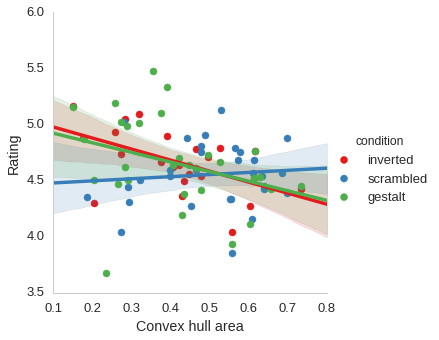

In [53]:
sns.set_style("whitegrid",{"axes.grid": False})
sns.set_context("talk")

g = sns.lmplot(x="hull", y="rating", hue="condition",\
           data=dfmerged, x_estimator=np.mean, palette="Set1");
g.set(xlabel='Convex hull area', ylabel='Rating');
sns.set_style("whitegrid",{"axes.grid": False})

In [114]:
# GLM test

model = smf.glm(formula="rating ~ condition * hull", data=dfmerged)
#model = smf.ols(formula="rating ~ hull", data=dfmerged)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                   83
Model:                            GLM   Df Residuals:                       77
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                  0.100381134843
Method:                          IRLS   Log-Likelihood:                -19.259
Date:                 vr, 03 mrt 2017   Deviance:                       7.7293
Time:                        02:13:02   Pearson chi2:                     7.73
No. Iterations:                     4                                         
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                       5.0088      0.167     30.055      0.000         4.682     5.335
c

### Interim conclusion: 

* If we add hull area to the model (and interaction with condition) for DV rating:
* Hull significantly influences ratings
* Interestingly the main scrambling effect also becomes significant here
* Interaction scramblingxhull is also (marginally) significant. As can be seen in the graph, this is because within the scrambling condition, hull does not seem to influence ratings much. This is only the case for the inverted and the Gestalt condition, specifically, both show a (similar) negative correlation.
* Together this seems to indicate that ratings are determined by low-level structural differences rather than high-level Gestalt or coherence.


### How is density distributed? (over images)

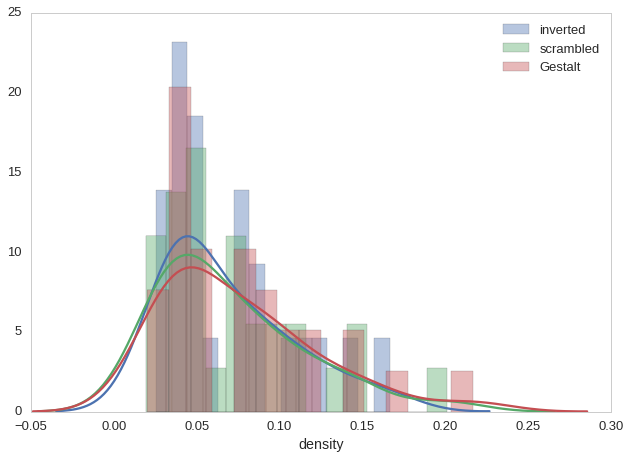

In [42]:

sns.distplot(dfmerged[dfmerged.condition=="inverted"].density, bins=15, label="inverted");
sns.distplot(dfmerged[dfmerged.condition=="scrambled"].density, bins=15, label="scrambled");
sns.distplot(dfmerged[dfmerged.condition=="gestalt"].density, bins=15, label="Gestalt");
plt.legend();
g.set(xlabel='Density', ylabel='Frequency');


### Does density differ across conditions? 

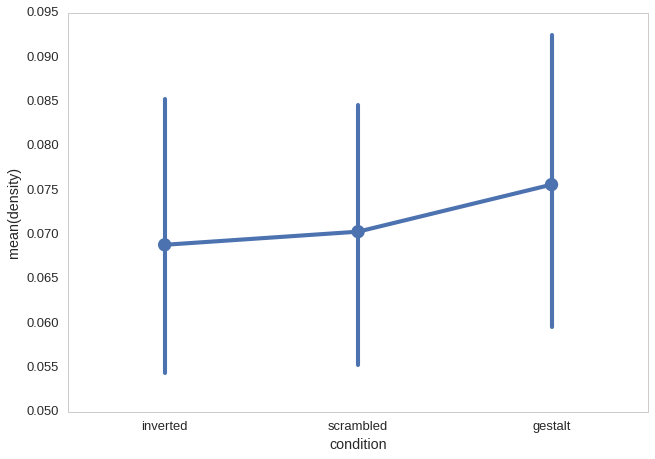

In [43]:
sns.pointplot(x="condition", y="density", data=dfmerged, linestyles=["-"]);
g.set(xlabel='Condition', ylabel='Average density');

In [78]:
# GLM test

model = smf.glm(formula="density ~ condition", data=dfmerged)
#model = smf.ols(formula="rating ~ hull", data=dfmerged)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                density   No. Observations:                   83
Model:                            GLM   Df Residuals:                       80
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                0.00192209410607
Method:                          IRLS   Log-Likelihood:                 143.31
Date:                 vr, 03 mrt 2017   Deviance:                      0.15377
Time:                        01:26:20   Pearson chi2:                    0.154
No. Iterations:                     4                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.0756      0.008      9.446      0.000         0.060     0.091
condition[T.inve

### Interim conclusion

* Density differs in the three conditions.
* Inverted imgs should have same density but as Gestalt but because some images were not inverted this is not the case (see notes at top)

### Are ratings dependent on density, in the different conditions?

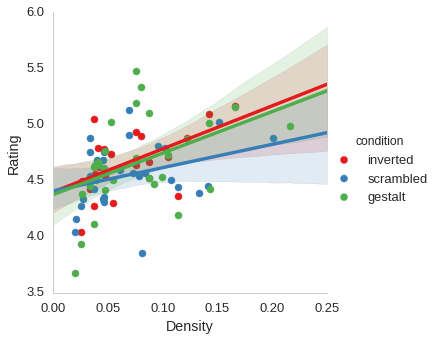

In [52]:
sns.set_style("whitegrid",{"axes.grid": False})
sns.set_context("talk")

g= sns.lmplot(x="density", y="rating",\
              hue="condition", data=dfmerged, x_estimator=np.mean, palette="Set1");
g.set(xlabel='Density', ylabel='Rating');


In [116]:
# GLM test

model = smf.glm(formula="rating ~ condition * density", data=dfmerged)
#model = smf.ols(formula="rating ~ hull", data=dfmerged)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                   83
Model:                            GLM   Df Residuals:                       77
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                 0.0927478328803
Method:                          IRLS   Log-Likelihood:                -15.976
Date:                 vr, 03 mrt 2017   Deviance:                       7.1416
Time:                        02:14:34   Pearson chi2:                     7.14
No. Iterations:                     4                                         
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
Intercept                          4.3755      0.107     41.019      0.000         4.166   

In [123]:
# GLM test

model = smf.glm(formula="rating ~ condition * hull * density", data=dfmerged)
#model = smf.ols(formula="rating ~ hull", data=dfmerged)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                   83
Model:                            GLM   Df Residuals:                       71
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                 0.0884165442869
Method:                          IRLS   Log-Likelihood:                -10.625
Date:                 vr, 03 mrt 2017   Deviance:                       6.2776
Time:                        02:32:39   Pearson chi2:                     6.28
No. Iterations:                     4                                         
                                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                               4.4749      0.303     14.767      0.000  

### Interim conclusion: 

* If we add density to the model (and interaction with condition) for DV rating:
* Density significantly influences ratings (higher density -> higher rating)
* No other significant relations.


## Is there a correlation between density and convex hull area? (Yes, a negative one, as expected)

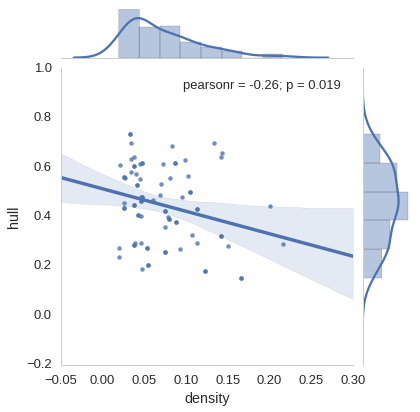

In [50]:
sns.jointplot(x="density", y="hull", data=dfmerged, kind="reg")

# Does difference in hull/density determines difference in liking on a per-image basis?

Make combined dataset:

In [16]:
ndf = dfNum.pivot_table(index=['participant','img'], columns=['condition'], values='acc')
ndf = ndf.reset_index()
adf = dfApp.pivot_table(index=['participant','img'], columns=['condition'], values='rating')
adf = adf.reset_index()
adf["diffGestalt"] = adf.gestalt - adf.scrambled
adf["diffInv"] = adf.inverted - adf.scrambled
andf = pd.merge(ndf, adf, how='outer', on=['participant', 'img'])
andf = pd.merge(andf, lldf, how = 'left', on = 'img')
andf.head()

,participant,img,Gestalt-scrambled,Inverted-Gestalt,Inverted-scrambled,gestalt,inverted,scrambled,diffGestalt,diffInv,hullDiff,densDiff
0,5635,1,1.0,0.0,1.0,5.0,4.0,2.0,3.0,2.0,-0.234444,0.004609
1,5635,2,0.0,NaN,NaN,5.0,NaN,3.0,2.0,NaN,-0.290244,0.011147
2,5635,3,1.0,0.0,0.0,5.0,4.0,2.0,3.0,2.0,-0.270767,0.010158
3,5635,4,0.0,0.0,1.0,7.0,7.0,6.0,1.0,1.0,-0.114578,0.008447
4,5635,5,0.0,0.0,1.0,6.0,7.0,3.0,3.0,4.0,-0.189000,0.002292


In [17]:
andf.to_csv("data_per_img_participant.csv")

In [ ]:
andf = pd.read_csv("data_per_img_participant.csv")

In [20]:
stats.ttest_1samp(andf[andf.diffInv.notnull()].diffInv, 0, axis=0)
stats.ttest_1samp(andf.diffGestalt, 0, axis=0)

Ttest_1sampResult(statistic=3.0867639862534233, pvalue=0.0020475102941535203)

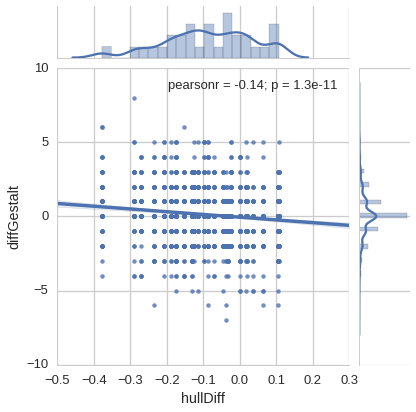

In [37]:
sns.jointplot(x="hullDiff", y="diffGestalt", data=andf, kind="reg");

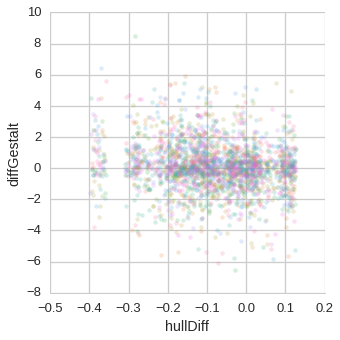

In [25]:
sns.lmplot(x="hullDiff", y="diffGestalt", hue="participant", units="participant", 
           y_jitter=0.5, x_jitter=0.02, data=andf, ci=False, fit_reg=False, legend=False, scatter_kws={'alpha':0.2}, line_kws={'alpha':0.2});

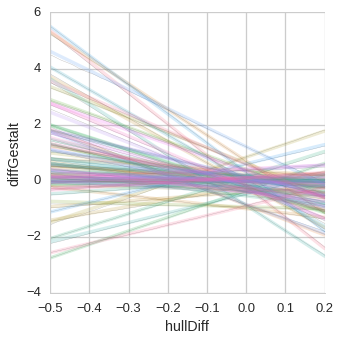

In [99]:
sns.lmplot(x="hullDiff", y="diffGestalt", hue="participant",\
           scatter=False, legend=False, ci=False, data=andf, line_kws={'alpha':0.2});

## Are participants with greatest effect also those with greatest effect of hulldiff/densdiff?

Select participants with greatest average effect (over images):

In [20]:
partHigh = andf.groupby('participant').filter(lambda x: x['diffGestalt'].mean() >= .3)
partLow = andf.groupby('participant').filter(lambda x: x['diffGestalt'].mean() < .1)
print(len(andf))
print(len(partHigh))
len(partHigh.participant.unique())

2310
600


20

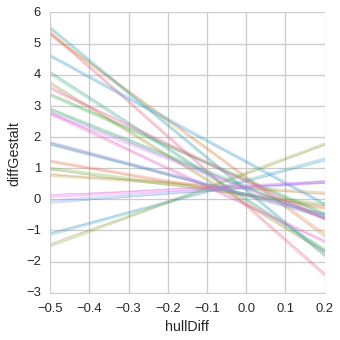

In [23]:
sns.lmplot(x="hullDiff", y="diffGestalt", hue="participant",\
           scatter=False, legend=False, ci=False, data=partHigh, line_kws={'alpha':0.3}, scatter_kws={'alpha':0.3});


In [117]:
model = smf.glm(formula="diffGestalt ~ hullDiff", data=andf)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            diffGestalt   No. Observations:                 2310
Model:                            GLM   Df Residuals:                     2308
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   2.44000985384
Method:                          IRLS   Log-Likelihood:                -4307.0
Date:                 vr, 17 mrt 2017   Deviance:                       5631.5
Time:                        20:27:17   Pearson chi2:                 5.63e+03
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0585      0.040     -1.459      0.144        -0.137     0.020
hullDiff      -1.8437      0.271     -6.798      0.0

# Does numerosity predict liking?

For those that overestimated the number of dots in the scrambled condition, did they like the scrambled images less?

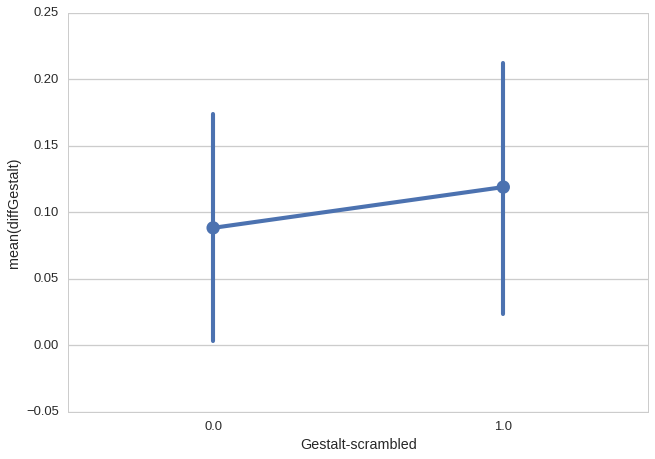

In [107]:
sns.pointplot(x="Gestalt-scrambled", y="diffGestalt", unit="participant", data=andf);

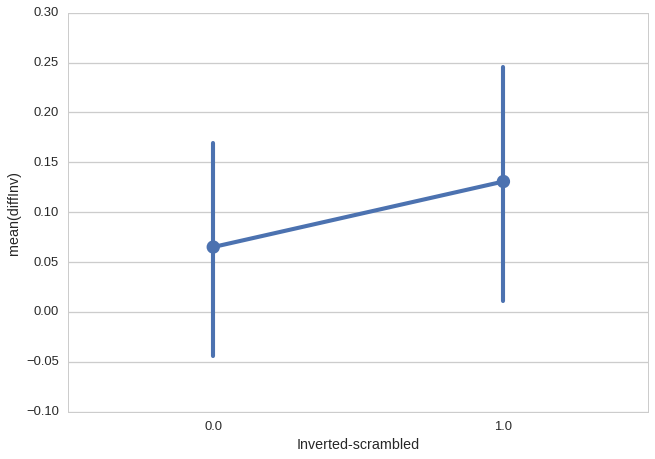

In [106]:
sns.pointplot(x="Inverted-scrambled", y="diffInv", unit="participant", data=andf);

In [53]:
stats.ttest_ind(andf.diffGestalt[andf["Gestalt-scrambled"]==0], 
                andf.diffGestalt[andf["Gestalt-scrambled"]==1])

Ttest_indResult(statistic=-0.46201517652970975, pvalue=0.6441139828079927)

In [ ]:
model = smf.glm(formula="diffGestalt ~ hullDiff", data=andf)

results = model.fit()
print(results.summary())

### Notes

Grouping & Numerosity studies:

http://www.ncbi.nlm.nih.gov/pubmed/26451701?dopt=Abstract 
http://pec.sagepub.com/content/20/5/681.abstract?id=p200681
http://www.sciencedirect.com/science/article/pii/0001691887900588
http://en.cnki.com.cn/Article_en/CJFDTOTAL-XLXB201210005.htm
http://www.journalofvision.org/content/13/8/5.full
http://www.amsciepub.com/doi/abs/10.2466/04.22.24.27.PMS.111.5.379-398
http://www.sciencedirect.com/science/article/pii/S0010027709001619
http://link.springer.com/article/10.3758/s13414-012-0349-1
http://www.jstor.org/stable/1419789
http://www.plosone.org/article/info%3Adoi%2F10.1371%2Fjournal.pone.0077556#s7
http://link.springer.com/article/10.3758/PBR.16.3.509
http://psycnet.apa.org/journals/xge/67/5/458/
http://www.sciencedirect.com/science/article/pii/0001691887900588
http://journal.frontiersin.org/article/10.3389/fpsyg.2015.01364/full

Stimuli:
- with all elements, check jittered version recognizable, then degrade (limit nb elements)
- which mask? Masking necessary?
- what about informativeness of contour elements

Control stimuli:
- density cue control-> check w Maarten-> possible control stim with same distance histogram
- keep nb of elements constant for coherent vs control


Procedure:
- 2AFC for preference (side-by-side) and for numerosity (which one has more dots?)
- double nb of stimuli & pp to increase power?

Other ideas:
- Possibly interesting variation: subliminal priming with consistent vs inconsistent playing cards